In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [3]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [4]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

In [5]:
import hickle as hkl
data_path = get_data_dir_path()
run_name = "test_run_catsim"

In [6]:
madness_results=[]
scarlet_results=[]

actual_photometry = []
madness_photometry = []
scarlet_photometry = []
blended_photometry = []

for file_num in range(18):
    madness_results.append(hkl.load(os.path.join(data_path, "results", run_name, "madness_reconstruction", str(file_num) + ".hkl")))
    scarlet_results.append(hkl.load(os.path.join(data_path, "results", run_name, "scarlet_reconstruction", str(file_num) + ".hkl")))
    
    actual_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "actual_photometry", str(file_num) + ".hkl")))
    madness_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "madness_photometry", str(file_num) + ".hkl")))
    scarlet_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "scarlet_photometry", str(file_num) + ".hkl")))
    blended_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "blended_photometry",  str(file_num) + ".hkl")))


        
madness_results = vstack(madness_results)
scarlet_results = vstack(scarlet_results)

actual_photometry = vstack(actual_photometry)
madness_photometry = vstack(madness_photometry)
scarlet_photometry = vstack(scarlet_photometry)
blended_photometry = vstack(blended_photometry)

In [7]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    madness_results[band+"_relative_flux_err"] = (madness_results[band+"_predicted_flux"]-madness_results[band+"_actual_flux"])/madness_results[band+"_actual_flux"]
    scarlet_results[band+"_relative_flux_err"] = (scarlet_results[band+"_predicted_flux"]-scarlet_results[band+"_actual_flux"])/scarlet_results[band+"_actual_flux"]

In [8]:
scarlet_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,r_band_snr,ref_mag,btk_size,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.9989863293175897,11091.220029558186,10085.845506506445,0.0016514175897172079,0.998912564155861,85001.56183074706,81168.9906751551,0.004883096828267819,0.9988007511128931,220388.43841739534,211676.43875792227,0.00923764792178261,0.9987539855516679,286999.2965947264,279810.3009540995,0.008571050323501583,0.9987012651956195,243663.07545073424,248196.67929563794,0.007632375685734383,0.9986763125908321,124399.1974934924,114801.51169846421,0.008140499117066158,0,2.934391691481652,0,0,402700974452,12.312215341975133,1.1502970222887008,0.92939889431,1.52888593949e-19,1.87639304513e-17,0.0,0.103462003171,0.63225120306,0.0748507976532,0.374639600515,224.244827271,224.244827271,24.3499164581,24.3860778809,24.0959835052,23.4892063141,23.1251525879,23.0250339508,96.86181000637494,23.4892063141,2.934391691481652,163.5610767830227,107.75148512149103,0.0,0.0,0.0,0.0,0.0,0.0,-0.09064598126918506,-0.04508824394572035,-0.03953020277303909,-0.02504882669025668,0.01860603555346793,-0.07715231278345072
0.9912000478432066,1037.598037178862,118.84765422112356,0.011283379026122198,0.9905453864340712,45971.83284291776,40866.213790537455,0.00403982974440964,0.9896128330238011,100247.58207408001,83400.06431320499,0.007919439755335489,0.9892419465276012,70700.76099157345,67332.15276952948,0.012728962465253346,0.9888365003198389,41297.25010053493,34194.991446629625,0.016476949193440116,0.9886502777406314,18242.641931918188,7502.433743781633,0.020205648337178084,1,3.20668812036312,0,0,402703695649,14.544104257126662,7.114506678623506,3.22528791428,0.0,1.97217807852e-18,0.0,0.0,0.688130497932,0.0,0.623354494572,0.0,341.729522705,26.9207649231,25.0528125763,24.9506931305,25.0097541809,25.0517215729,25.1087379456,44.60263238955758,25.0097541809,3.20668812036312,174.72052140621386,137.57253349562268,0.0,0.0,0.0,0.0,0.0,0.0,-0.8854588675357753,-0.11105972367527348,-0.16805909341958197,-0.04764599665971718,-0.17197897285207644,-0.5887419282919203
0.9960897896521828,8720.613220749277,9039.23668983394,0.0014067700349087442,0.9956926286473069,66592.48838640552,63018.37479132533,0.0019020802710597584,0.9951117866857522,128773.7828390781,124541.70909111392,0.0033745694277356186,0.9948735259677384,103375.18918467802,103971.08419740736,0.003851706499187313,0.9946125139218813,74608.25445650215,92640.60012360233,0.0036501081473753194,0.9944905523804688,43778.49377571314,35638.406381535446,0.003205386173519842,2,2.9987727965302757,0,0,402702291885,-6.411101875014888,14.782820665450881,1.6642203331,1.95283900939e-19,7.89798335438e-18,0.0,0.141510695219,0.651383280754,0.139605402946,0.627531170845,140.861190796,140.861190796,24.6102561951,24.6504096985,24.6787395477,24.5972042084,24.4094905853,24.1582489014,57.137388551787396,24.5972042084,2.998

In [9]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3487.853483886719,207.47012355510074,0,29831.05992431641,834.4427230942819,0,80700.22969238283,1918.1784953439553,0,106294.89374023439,2315.528269639565,0,95328.55533935549,2679.440259177278,0,46179.652759399425,2872.204770729274,0,0,0,0
255.80799590826032,207.32355333295243,0,13231.726762084965,833.8532191541567,0,27730.696646728516,1916.823370840412,0,21936.512179565427,2313.8924317316482,0,12921.099093475346,2677.5473304640204,0,8327.241048202515,2870.1756607828033,0,1,0,0
2351.1747871398925,207.6165903037037,0,19096.182242431645,835.0318108648618,0,37983.90525665283,1919.5326631761181,0,32824.885764007566,2317.1629527020755,0,23682.626797637946,2681.3318515478463,0,14962.625126113891,2874.2324481937785,0,2,0,0
2269.7838111114506,207.6165903037037,0,15264.566742932799,835.0318108648618,0,43576.71061767579,1919.5326631761184,0,53093.58618164063,2317.1629527020755,0,44243.411875000005,2681.3318515478463,0,24489.21860382081,2874.2324481937785,0,3,0,0
13892.258259887698,207.4701235551007,0,122379.99646972658,834.4427230942817,0,280152.62123046885,1918.1784953439555,0,279455.8349609375,2315.528269639566,0,192998.4378710938,2679.4402591772787,0,91258.04769531252,2872.204770729274,0,4,0,0
2213.7126797747615,207.76295379759873,0,27070.450701904298,835.6204833460583,0,104359.61903320314,1920.8858763601759,0,91861.98597412111,2318.796483361574,0,57676.40889770508,2683.22211040197,0,27898.91340301514,2876.2586962058895,0,5,0,0
30261.857192382817,206.29464597277183,0,227707.97234375004,829.7149642347065,0,684987.0416796876,1907.3105410498836,0,603674.0342773439,2302.409023718418,0,499076.098359375,2664.259172359176,0,295738.7811914063,2855.9315249144192,0,6,0,0
1814.6934943223007,207.32355333295243,0,10402.075337162021,833.8532191541567,0,53737.51199462891,1916.8233708404123,0,68941.01865722657,2313.8924317316487,0,73421.59795410157,2677.5473304640204,0,47199.261247863775,2870.1756607828033,0,7,0,0
-18.59681359291084,207.6165903037037,0,10103.097946987155,835.0318108648618,0,84467.82024536132,1919.5326631761181,0,127215.1141674805,2317.1629527020755,0,114363.45001831056,2681.331851547846,0,64295.11197265626,2874.2324481937785,0,8,0,0


### Plot the correlations

(0.98, 1.0)

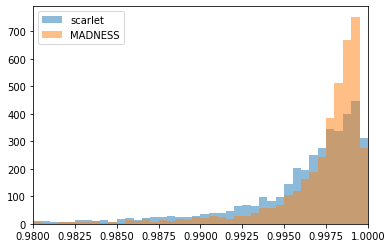

In [10]:
bins = np.arange(0.95, 1, 0.0005)
cov_band = 'r'
plt.hist(scarlet_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="scarlet")
plt.hist(madness_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="MADNESS")
plt.legend()
plt.xlim([0.98, 1])

### Plot the relative flux error

In [11]:
def gauss(x, sig, mu, a):
    return np.exp(-(x-mu)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)

In [12]:
from scipy.optimize import curve_fit
from scipy.stats import norm

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.13602912730963249
Madness sig: 0.26017827292808626
Scarlet mu: -0.0013331014861463965
Scarlet sig: 0.21010415018836456


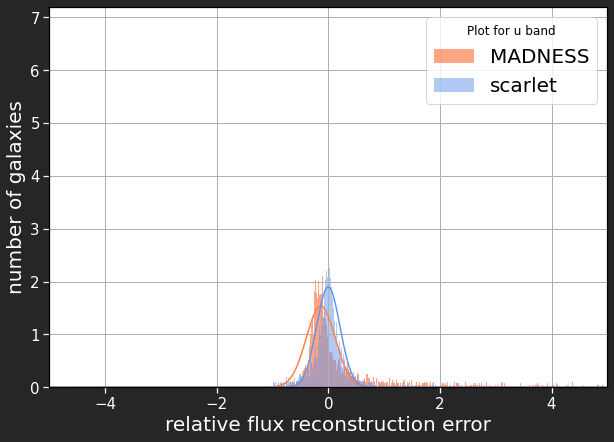

Madness mu: -0.01911668834783987
Madness sig: 0.10938853952269573
Scarlet mu: 0.0006122942068517083
Scarlet sig: 0.08515877743461552


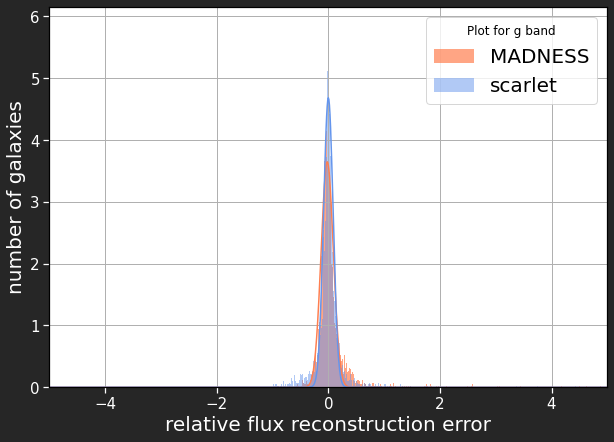

Madness mu: -0.04259784983626601
Madness sig: 0.10942973678277826
Scarlet mu: 0.005368450530653789
Scarlet sig: 0.0720258343444391


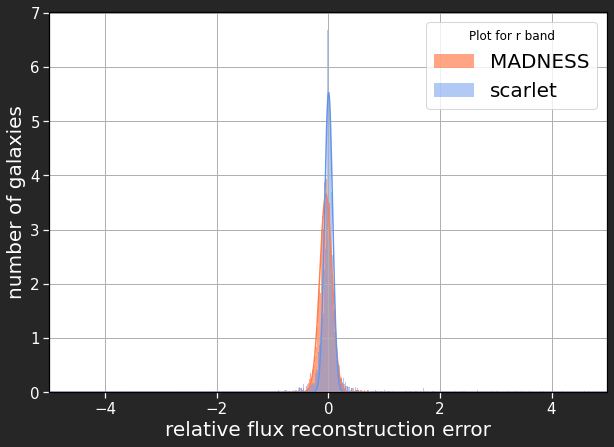

Madness mu: -0.020755164399651832
Madness sig: 0.08579294427453016
Scarlet mu: 0.008029973256890777
Scarlet sig: 0.07634047999079724


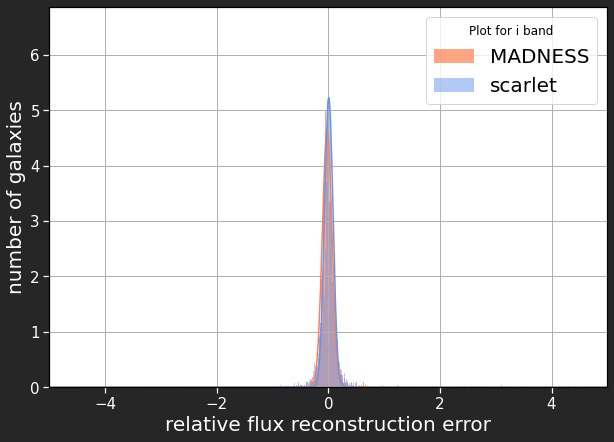

Madness mu: -0.009894937994244546
Madness sig: 0.12381683590820876
Scarlet mu: 0.0059218656354257816
Scarlet sig: 0.0970084746233312


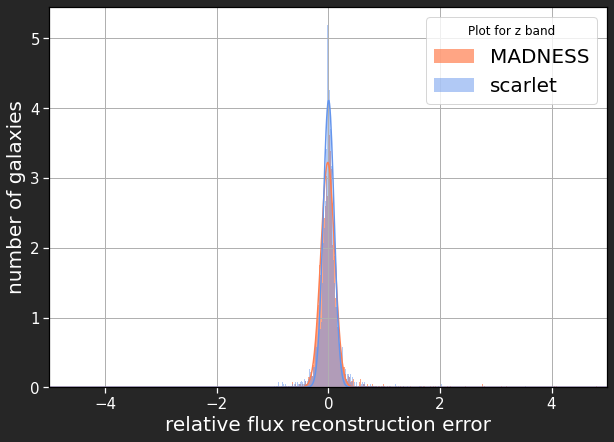

Madness mu: 0.004298703971321612
Madness sig: 0.21928360652548698
Scarlet mu: 0.002225585425642855
Scarlet sig: 0.1452899377584904


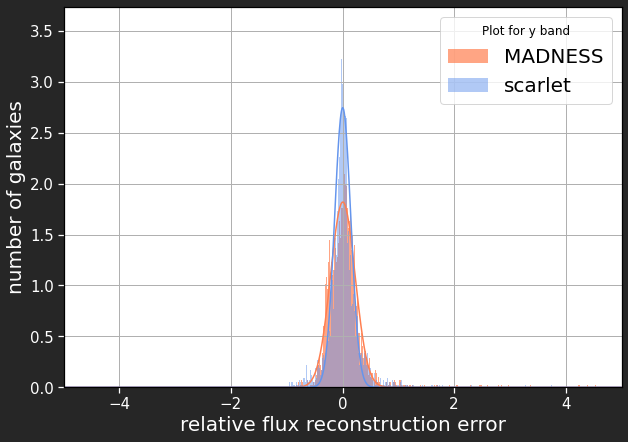

In [13]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].value
    madness_predicted_flux = madness_results[band+"_predicted_flux"].value

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
    sns.set_theme(style={"axes.grid": True,
                     'axes.labelcolor': 'white',
                     'figure.facecolor': '.15',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'text.color': 'black',
                     'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-5, 5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.7,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-5, 5])
    plt.show()

# Compare apperture photometry

In [14]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3487.853483886719,207.47012355510074,0,29831.05992431641,834.4427230942819,0,80700.22969238283,1918.1784953439553,0,106294.89374023439,2315.528269639565,0,95328.55533935549,2679.440259177278,0,46179.652759399425,2872.204770729274,0,0,0,0
255.80799590826032,207.32355333295243,0,13231.726762084965,833.8532191541567,0,27730.696646728516,1916.823370840412,0,21936.512179565427,2313.8924317316482,0,12921.099093475346,2677.5473304640204,0,8327.241048202515,2870.1756607828033,0,1,0,0
2351.1747871398925,207.6165903037037,0,19096.182242431645,835.0318108648618,0,37983.90525665283,1919.5326631761181,0,32824.885764007566,2317.1629527020755,0,23682.626797637946,2681.3318515478463,0,14962.625126113891,2874.2324481937785,0,2,0,0
2269.7838111114506,207.6165903037037,0,15264.566742932799,835.0318108648618,0,43576.71061767579,1919.5326631761184,0,53093.58618164063,2317.1629527020755,0,44243.411875000005,2681.3318515478463,0,24489.21860382081,2874.2324481937785,0,3,0,0
13892.258259887698,207.4701235551007,0,122379.99646972658,834.4427230942817,0,280152.62123046885,1918.1784953439555,0,279455.8349609375,2315.528269639566,0,192998.4378710938,2679.4402591772787,0,91258.04769531252,2872.204770729274,0,4,0,0
2213.7126797747615,207.76295379759873,0,27070.450701904298,835.6204833460583,0,104359.61903320314,1920.8858763601759,0,91861.98597412111,2318.796483361574,0,57676.40889770508,2683.22211040197,0,27898.91340301514,2876.2586962058895,0,5,0,0
30261.857192382817,206.29464597277183,0,227707.97234375004,829.7149642347065,0,684987.0416796876,1907.3105410498836,0,603674.0342773439,2302.409023718418,0,499076.098359375,2664.259172359176,0,295738.7811914063,2855.9315249144192,0,6,0,0
1814.6934943223007,207.32355333295243,0,10402.075337162021,833.8532191541567,0,53737.51199462891,1916.8233708404123,0,68941.01865722657,2313.8924317316487,0,73421.59795410157,2677.5473304640204,0,47199.261247863775,2870.1756607828033,0,7,0,0
-18.59681359291084,207.6165903037037,0,10103.097946987155,835.0318108648618,0,84467.82024536132,1919.5326631761181,0,127215.1141674805,2317.1629527020755,0,114363.45001831056,2681.331851547846,0,64295.11197265626,2874.2324481937785,0,8,0,0


In [15]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3490.022491149903,207.47012355510074,0,29883.21500732422,834.4427230942819,0,80962.87595214846,1918.1784953439553,0,106479.64787597659,2315.528269639565,0,95543.20071044922,2679.440259177278,0,46321.6545263672,2872.204770729274,0,0,0,0
256.80959249734883,207.32355333295243,0,13251.457458496097,833.8532191541567,0,27824.206538085942,1916.823370840412,0,22043.07723388673,2313.8924317316482,0,13002.255927276616,2677.5473304640204,0,8371.678829078675,2870.1756607828033,0,1,0,0
2351.875224170685,207.6165903037037,0,19103.81089477539,835.0318108648618,0,38011.87681549072,1919.5326631761181,0,32851.602595672615,2317.1629527020755,0,23701.551485328673,2681.3318515478463,0,14972.541326980592,2874.2324481937785,0,2,0,0
2372.1952218627935,207.6165903037037,0,15701.971916046146,835.0318108648618,0,44826.760920410175,1919.5326631761184,0,54379.6482373047,2317.1629527020755,0,45371.73411376955,2681.3318515478463,0,25213.10138954163,2874.2324481937785,0,3,0,0
13894.86260742188,207.4701235551007,0,122410.26220214846,834.4427230942817,0,280246.75228515634,1918.1784953439555,0,279470.611640625,2315.528269639566,0,193049.74552734377,2679.4402591772787,0,91296.08521484376,2872.204770729274,0,4,0,0
2215.1680240726473,207.76295379759873,0,27076.19565734864,835.6204833460583,0,104386.92889648437,1920.8858763601759,0,91850.75675048829,2318.796483361574,0,57702.39883117676,2683.22211040197,0,27913.71261413574,2876.2586962058895,0,5,0,0
30266.599167480468,206.29464597277183,0,227743.3978125,829.7149642347065,0,685067.8753515626,1907.3105410498836,0,603788.9713085939,2302.409023718418,0,499168.5508203125,2664.259172359176,0,295786.88516601565,2855.9315249144192,0,6,0,0
1891.6496072101595,207.32355333295243,0,11194.777691726684,833.8532191541567,0,55959.20485839845,1916.8233708404123,0,71369.07844970704,2313.8924317316487,0,74952.65568847659,2677.5473304640204,0,47950.759139404305,2870.1756607828033,0,7,0,0
207.72088250875473,207.6165903037037,0,-1143.4789752578731,835.0318108648618,0,48332.67201049805,1919.5326631761181,0,54387.326207218175,2317.1629527020755,0,46342.365326385494,2681.331851547846,0,16596.172778415683,2874.2324481937785,0,8,0,0


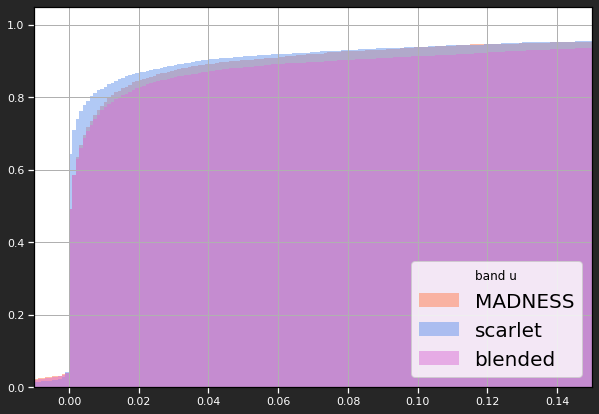

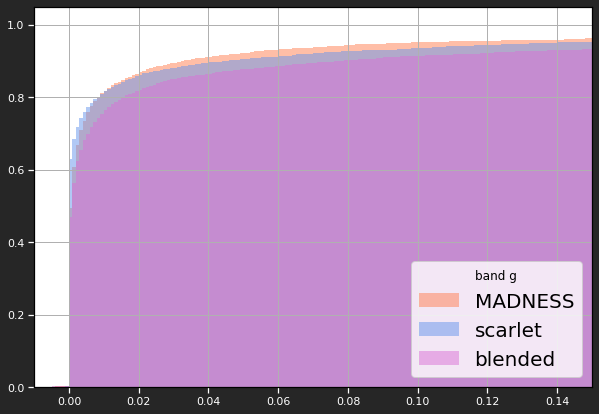

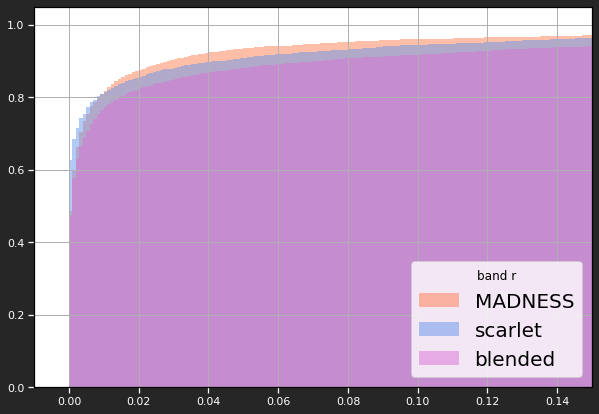

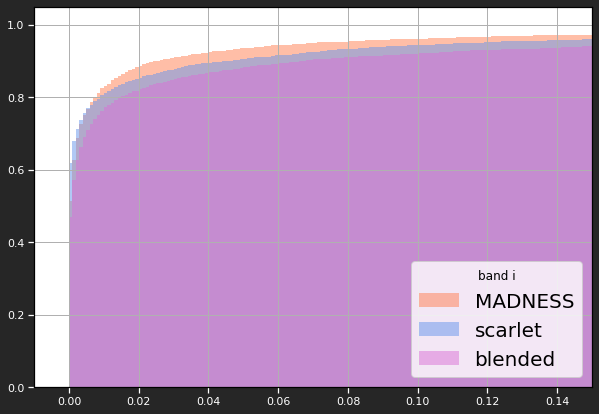

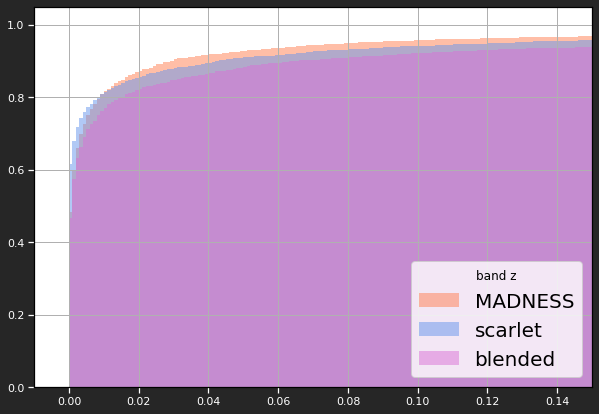

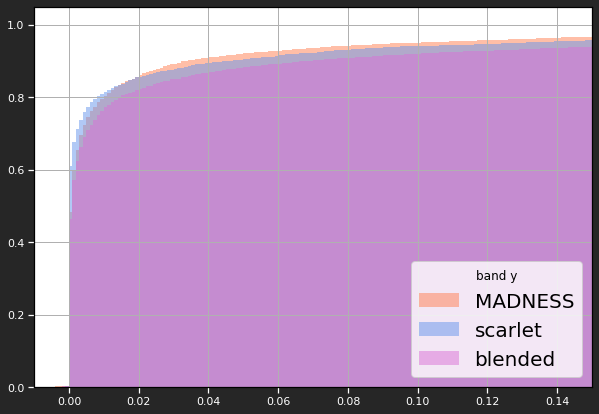

In [16]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    plt.figure(figsize=(10, 7))
    bins = np.arange(-1, 1, 0.001)
    plt.hist(
        np.abs((madness_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.5,
        density=True,
        label="MADNESS",
        cumulative=True,
        color="coral"
    )

    plt.hist(
        np.abs((scarlet_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        density=True,
        alpha=0.5,
        label="scarlet",
        cumulative=True,
        color="cornflowerblue"
    )

    plt.hist(
        (blended_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.5,
        density=True,
        label="blended",
        cumulative=True,
        color="orchid",
    )
    plt.xlim([-.01, .15])

    plt.legend(fontsize=20, title="band " + band, loc="lower right")
    plt.show()

# error variation plots

/tmp/ipykernel_9978/4022407744.py:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  h = plt.hist2d(madness_results['size'].value, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
/tmp/ipykernel_9978/4022407744.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(h[3])


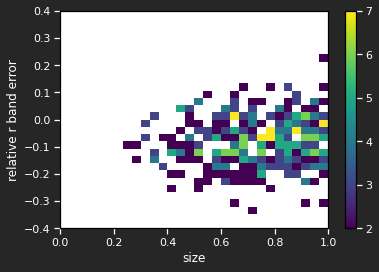

In [17]:
h = plt.hist2d(madness_results['size'].value, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
plt.xlabel("size")
plt.ylabel("relative r band error")
plt.colorbar(h[3])
#plt.ylim(-.1,.1)

# Plot SNR

In [18]:
madness_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,r_band_snr,ref_mag,btk_size,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.9952741717103342,11091.220029558186,9007.247,0.0016514175897172079,0.99863025953803,85001.56183074706,79589.05,0.004883096828267819,0.9991459160901301,220388.43841739534,230225.38,0.00923764792178261,0.9991726657010713,286999.2965947264,269698.53,0.008571050323501583,0.9984881234191492,243663.07545073424,232466.97,0.007632375685734383,0.9977098403508338,124399.1974934924,131362.2,0.008140499117066158,0,2.934391691481652,0,0,402700974452,12.312215341975133,1.1502970222887008,0.92939889431,1.52888593949e-19,1.87639304513e-17,0.0,0.103462003171,0.63225120306,0.0748507976532,0.374639600515,224.244827271,224.244827271,24.3499164581,24.3860778809,24.0959835052,23.4892063141,23.1251525879,23.0250339508,96.86181000637494,23.4892063141,2.934391691481652,163.5610767830227,107.75148512149103,0.0,0.0,0.0,0.0,0.0,0.0,-0.1878939335521144,-0.06367547653447027,0.0446345400568355,-0.060281560094403,-0.045949131521152264,0.05597307516289932
0.9906362219952524,1037.598037178862,3566.3298,0.011283379026122198,0.996044117841279,45971.83284291776,35996.023,0.00403982974440964,0.9975176863306857,100247.58207408001,75754.414,0.007919439755335489,0.9964834091658772,70700.76099157345,62024.938,0.012728962465253346,0.9880799515818286,41297.25010053493,40078.92,0.016476949193440116,0.9833835222563809,18242.641931918188,23640.709,0.020205648337178084,1,3.20668812036312,0,0,402703695649,14.544104257126662,7.114506678623506,3.22528791428,0.0,1.97217807852e-18,0.0,0.0,0.688130497932,0.0,0.623354494572,0.0,341.729522705,26.9207649231,25.0528125763,24.9506931305,25.0097541809,25.0517215729,25.1087379456,44.60263238955758,25.0097541809,3.20668812036312,174.72052140621386,137.57253349562268,0.0,0.0,0.0,0.0,0.0,0.0,2.4371015616807767,-0.21699829631557963,-0.24432677082904883,-0.12271188272793114,-0.02950143708283259,0.29590379905511927
0.9954311695183699,8720.613220749277,7297.17,0.0014067700349087442,0.9977305563037737,66592.48838640552,68256.09,0.0019020802710597584,0.9971755654751664,128773.7828390781,132344.08,0.0033745694277356186,0.9967018753242359,103375.18918467802,110565.91,0.003851706499187313,0.9955673523760907,74608.25445650215,74873.78,0.0036501081473753194,0.9896966945017086,43778.49377571314,43551.375,0.003205386173519842,2,2.9987727965302757,0,0,402702291885,-6.411101875014888,14.782820665450881,1.6642203331,1.95283900939e-19,7.89798335438e-18,0.0,0.141510695219,0.651383280754,0.139605402946,0.627531170845,140.861190796,140.861190796,24.6102561951,24.6504096985,24.6787395477,24.5972042084,24.4094905853,24.1582489014,57.137388551787396,24.5972042084,2.9987727965302757,69.94449061462393,175.9141034893985,0.0,0.0,0.0,0.0,0.0,0.0,-0.16322743170026463,0.024981877144181028,0.027725327370273074,0.0695594090036042,0.003558946

In [19]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3490.022491149903,207.47012355510074,0,29883.21500732422,834.4427230942819,0,80962.87595214846,1918.1784953439553,0,106479.64787597659,2315.528269639565,0,95543.20071044922,2679.440259177278,0,46321.6545263672,2872.204770729274,0,0,0,0
256.80959249734883,207.32355333295243,0,13251.457458496097,833.8532191541567,0,27824.206538085942,1916.823370840412,0,22043.07723388673,2313.8924317316482,0,13002.255927276616,2677.5473304640204,0,8371.678829078675,2870.1756607828033,0,1,0,0
2351.875224170685,207.6165903037037,0,19103.81089477539,835.0318108648618,0,38011.87681549072,1919.5326631761181,0,32851.602595672615,2317.1629527020755,0,23701.551485328673,2681.3318515478463,0,14972.541326980592,2874.2324481937785,0,2,0,0
2372.1952218627935,207.6165903037037,0,15701.971916046146,835.0318108648618,0,44826.760920410175,1919.5326631761184,0,54379.6482373047,2317.1629527020755,0,45371.73411376955,2681.3318515478463,0,25213.10138954163,2874.2324481937785,0,3,0,0
13894.86260742188,207.4701235551007,0,122410.26220214846,834.4427230942817,0,280246.75228515634,1918.1784953439555,0,279470.611640625,2315.528269639566,0,193049.74552734377,2679.4402591772787,0,91296.08521484376,2872.204770729274,0,4,0,0
2215.1680240726473,207.76295379759873,0,27076.19565734864,835.6204833460583,0,104386.92889648437,1920.8858763601759,0,91850.75675048829,2318.796483361574,0,57702.39883117676,2683.22211040197,0,27913.71261413574,2876.2586962058895,0,5,0,0
30266.599167480468,206.29464597277183,0,227743.3978125,829.7149642347065,0,685067.8753515626,1907.3105410498836,0,603788.9713085939,2302.409023718418,0,499168.5508203125,2664.259172359176,0,295786.88516601565,2855.9315249144192,0,6,0,0
1891.6496072101595,207.32355333295243,0,11194.777691726684,833.8532191541567,0,55959.20485839845,1916.8233708404123,0,71369.07844970704,2313.8924317316487,0,74952.65568847659,2677.5473304640204,0,47950.759139404305,2870.1756607828033,0,7,0,0
207.72088250875473,207.6165903037037,0,-1143.4789752578731,835.0318108648618,0,48332.67201049805,1919.5326631761181,0,54387.326207218175,2317.1629527020755,0,46342.365326385494,2681.331851547846,0,16596.172778415683,2874.2324481937785,0,8,0,0


In [20]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3487.853483886719,207.47012355510074,0,29831.05992431641,834.4427230942819,0,80700.22969238283,1918.1784953439553,0,106294.89374023439,2315.528269639565,0,95328.55533935549,2679.440259177278,0,46179.652759399425,2872.204770729274,0,0,0,0
255.80799590826032,207.32355333295243,0,13231.726762084965,833.8532191541567,0,27730.696646728516,1916.823370840412,0,21936.512179565427,2313.8924317316482,0,12921.099093475346,2677.5473304640204,0,8327.241048202515,2870.1756607828033,0,1,0,0
2351.1747871398925,207.6165903037037,0,19096.182242431645,835.0318108648618,0,37983.90525665283,1919.5326631761181,0,32824.885764007566,2317.1629527020755,0,23682.626797637946,2681.3318515478463,0,14962.625126113891,2874.2324481937785,0,2,0,0
2269.7838111114506,207.6165903037037,0,15264.566742932799,835.0318108648618,0,43576.71061767579,1919.5326631761184,0,53093.58618164063,2317.1629527020755,0,44243.411875000005,2681.3318515478463,0,24489.21860382081,2874.2324481937785,0,3,0,0
13892.258259887698,207.4701235551007,0,122379.99646972658,834.4427230942817,0,280152.62123046885,1918.1784953439555,0,279455.8349609375,2315.528269639566,0,192998.4378710938,2679.4402591772787,0,91258.04769531252,2872.204770729274,0,4,0,0
2213.7126797747615,207.76295379759873,0,27070.450701904298,835.6204833460583,0,104359.61903320314,1920.8858763601759,0,91861.98597412111,2318.796483361574,0,57676.40889770508,2683.22211040197,0,27898.91340301514,2876.2586962058895,0,5,0,0
30261.857192382817,206.29464597277183,0,227707.97234375004,829.7149642347065,0,684987.0416796876,1907.3105410498836,0,603674.0342773439,2302.409023718418,0,499076.098359375,2664.259172359176,0,295738.7811914063,2855.9315249144192,0,6,0,0
1814.6934943223007,207.32355333295243,0,10402.075337162021,833.8532191541567,0,53737.51199462891,1916.8233708404123,0,68941.01865722657,2313.8924317316487,0,73421.59795410157,2677.5473304640204,0,47199.261247863775,2870.1756607828033,0,7,0,0
-18.59681359291084,207.6165903037037,0,10103.097946987155,835.0318108648618,0,84467.82024536132,1919.5326631761181,0,127215.1141674805,2317.1629527020755,0,114363.45001831056,2681.331851547846,0,64295.11197265626,2874.2324481937785,0,8,0,0


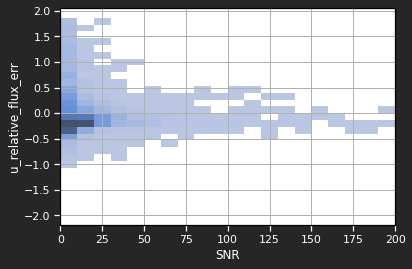

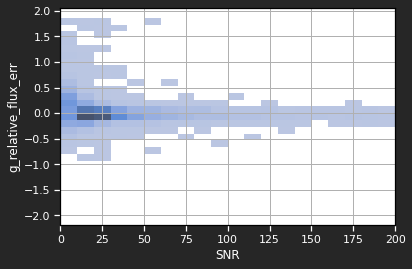

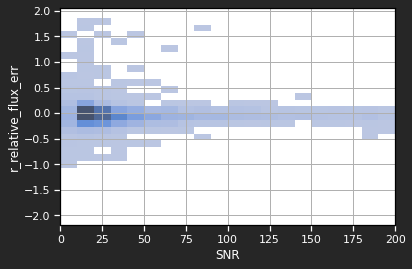

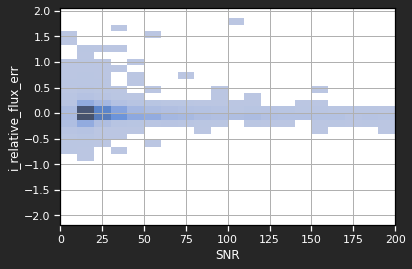

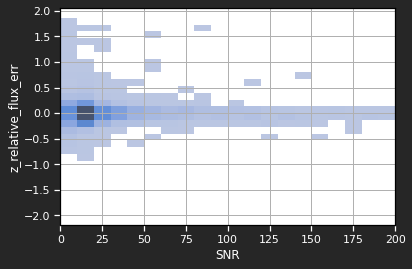

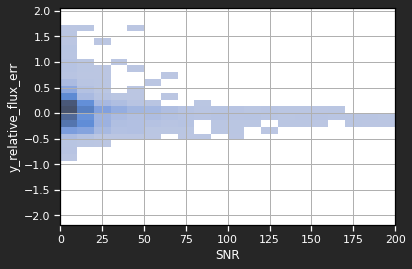

In [21]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,1000,1000/100.0)
    y_bins = np.arange(-2, 2, 4/30.0)
    sns.histplot(x=snr, y=madness_results[band+ "_relative_flux_err"], bins=[x_bins, y_bins], kde=True)
    plt.xlim(0,200)
    plt.xlabel("SNR")
    plt.show()

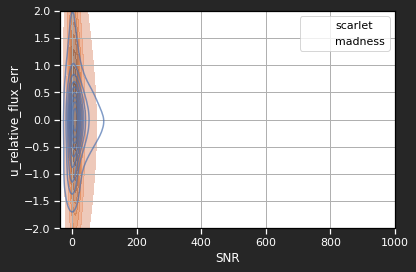

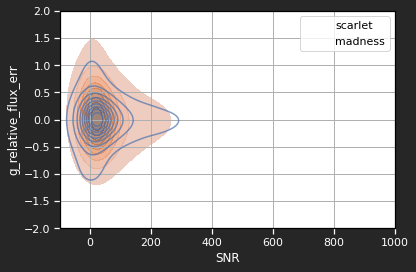

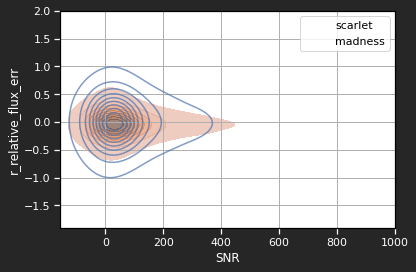

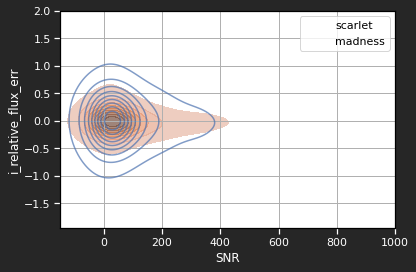

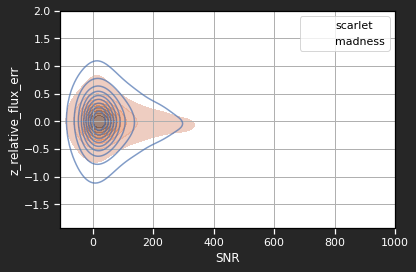

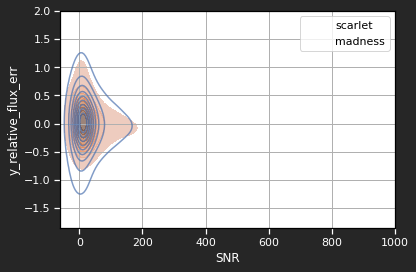

In [22]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    sns.kdeplot(x=snr, y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=True, alpha=.7, label="madness")
    plt.legend()
    plt.xlabel("SNR")
    plt.show()

# Compare with blendedness

/tmp/ipykernel_9978/3305847454.py:2: RuntimeWarning: invalid value encountered in log
  snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])


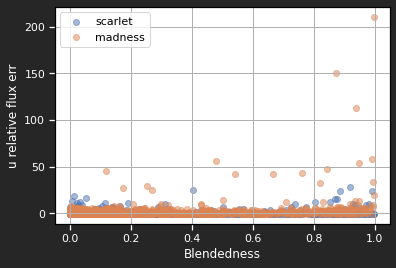

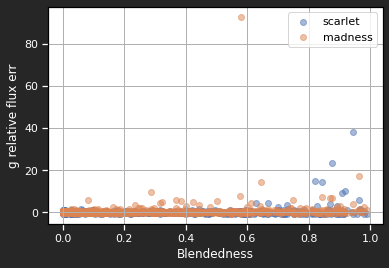

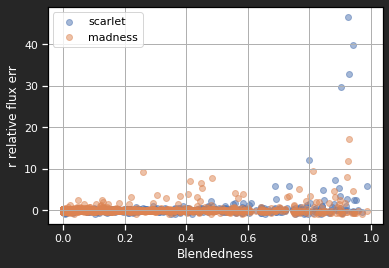

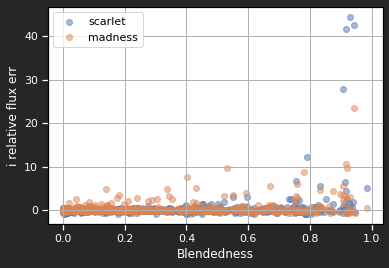

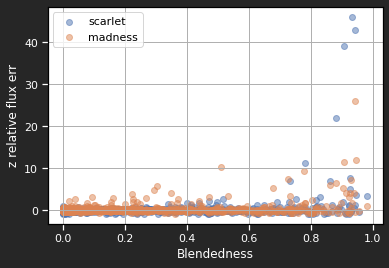

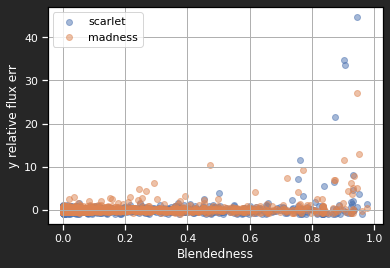

In [23]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    plt.scatter(scarlet_results[band+"_blendedness"], scarlet_results[band+ "_relative_flux_err"], alpha=.5, label="scarlet")
    plt.scatter(madness_results[band+"_blendedness"], madness_results[band+ "_relative_flux_err"], alpha=.5, label="madness")
    plt.xlabel("Blendedness")
    plt.ylabel(band+" relative flux err")
    #sns.kdeplot(x=madness_results[band+"_blendedness"], y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7)
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7
    plt.legend()
    plt.show()

In [24]:
# Validate SNR vs mag 

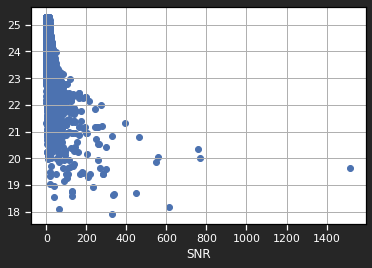

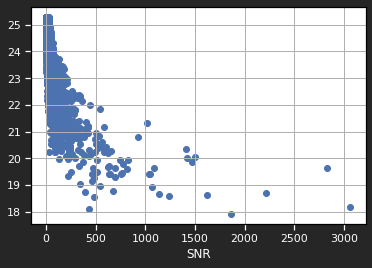

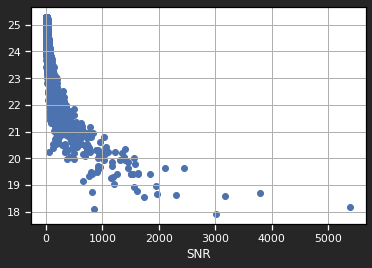

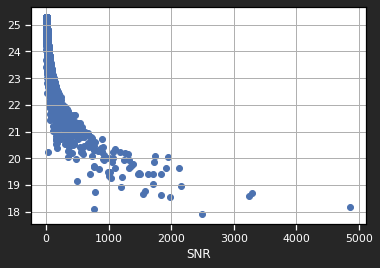

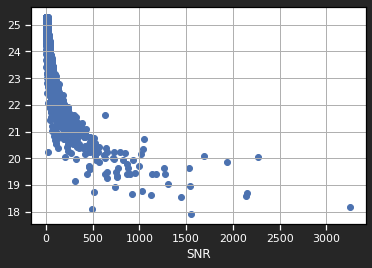

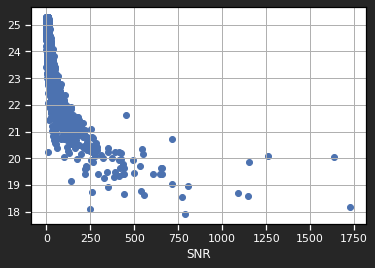

In [25]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    plt.scatter(x=snr, y=madness_results["ref_mag"])
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    plt.xlabel("SNR")
    plt.show()

Plot for u band


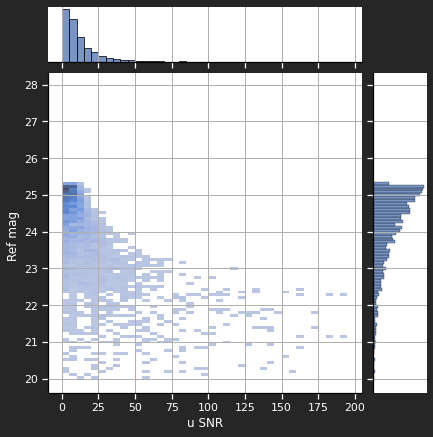

Plot for g band


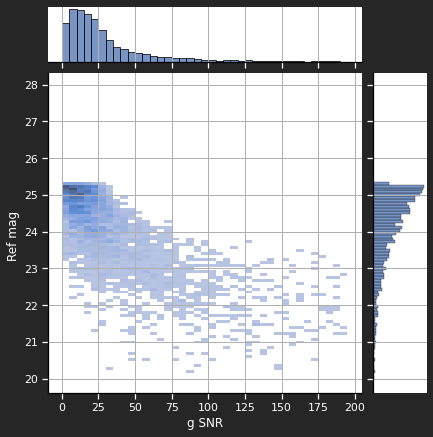

Plot for r band


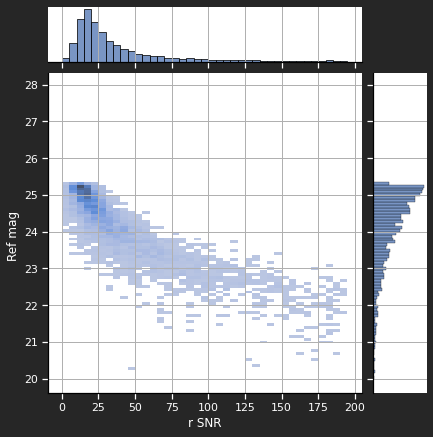

Plot for i band


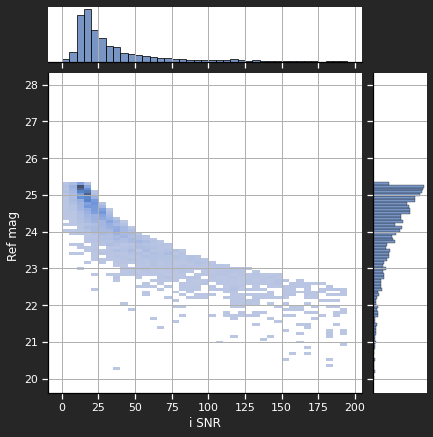

Plot for z band


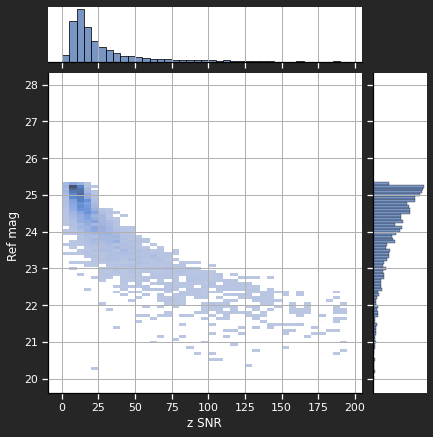

Plot for y band


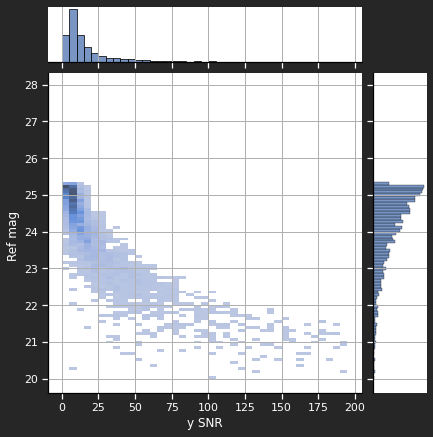

In [26]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    print(f"Plot for {band} band")
    snr = actual_photometry[band+"_flux"].value / actual_photometry[band+"_fluxerrs"].value
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,200,5.0)
    y_bins = np.arange(20, 28, 8/100.0)
    #sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, cbar=True)
    g = sns.JointGrid()
    sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, ax=g.ax_joint)
    g.ax_joint.set_xlabel(band + " SNR")
    g.ax_joint.set_ylabel("Ref mag ")
    sns.histplot(x=snr, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
    sns.histplot(y=madness_results["ref_mag"], ax=g.ax_marg_y, bins=y_bins)
    #ax.set(xlabel='SNR', ylabel='Ref Mag '+band)
    
    plt.show()

In [27]:
np.sum(madness_results['ref_mag']!=madness_results['mag_auto'])

KeyError: 'mag_auto'